<a href="https://colab.research.google.com/github/mofuoku417/Univariate_Crude_Palm_Oil_Price_Prediction/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Data Acquisition

The dataset is available at the following links:https://www.indexmundi.com/commodities/?commodity=palm-oil&months=300.

####We are going to follow the following steps in the EDA

* Data Insights and Plotting
* Missing Values
* Check datatypes
* Stationary Test
  * ADF Test
  * KPSS Test
* ACF and PACF Plot

In [35]:
#Load Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import read_csv
import os
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

####Load Data
Crude Palm Oil  Price contains data from 1979 to 2022

In [3]:
path = 'https://raw.githubusercontent.com/mofuoku417/Univariate_Crude_Palm_Oil_Price_Prediction/main/Data/data.csv'
df = read_csv(path, parse_dates=True)
#df = read_csv(path,index_col='Month', parse_dates=True)
df.head()

,Month,Price,Change
0,1993-03,408,-
1,1993-04,392,-3.92%
2,1993-05,371,-5.36%
3,1993-06,356,-4.04%
4,1993-07,362,1.69%


In [4]:
df.tail()

,Month,Price,Change
356,2022-11,945.74,6.38%
357,2022-12,940.39,-0.57%
358,2023-01,941.97,0.17%
359,2023-02,949.98,0.85%
360,2023-03,972.06,2.32%


* Our data first column is Month, so we need to rename it to date
* The second column is price, so we rename to cpo_pri (crude palm oil price)

In [8]:
#renaming Month column to date
df.rename(columns={'Month': 'date', 'Price': 'cpo_pri'}, inplace=True)
df.head()

,date,cpo_pri,Change
0,1993-03,408,-
1,1993-04,392,-3.92%
2,1993-05,371,-5.36%
3,1993-06,356,-4.04%
4,1993-07,362,1.69%


* We remove the Change column because it is not needed




In [9]:
#Delete change column
del df['Change']

In [11]:
df.dtypes

date       object
cpo_pri    object
dtype: object

* Convert the date from object to datetime



In [12]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     361 non-null    datetime64[ns]
 1   cpo_pri  361 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 5.8+ KB


In [13]:
# Change the data index from string to date
df.set_index('date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 1993-03-01 to 2023-03-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cpo_pri  361 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


In [18]:
#Examining the data's dimensions, datatypes, missing values, and commas
print(df.shape)
#Remove the commas from the data
df["cpo_pri"] = [float(str(i).replace(",", "")) for i in df["cpo_pri"]]

print(df.dtypes)   

(361, 1)
cpo_pri    float64
dtype: object


####Plot the data

<Axes: xlabel='date'>

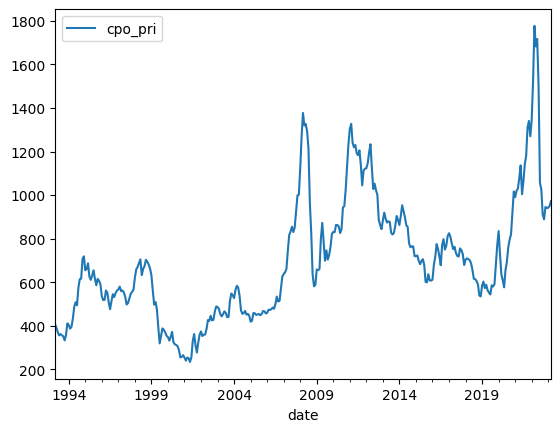

In [21]:
#fig = px.line(df, x='date', y="cpo_pri")
#fig.show()
df.plot()

####Check any null value present

In [26]:
df.isnull().sum()

#The dataset in this case is clean, with no null values.

cpo_pri    0
dtype: int64

####Check Datatype of cpo_pri values

In [27]:
df.cpo_pri.dtype

#Because the type is float, we may move on to further EDA tasks

dtype('float64')

####Stationarity and detrending (ADF/KPSS)

The statistical features of a time series, such as mean, variance, and covariance, are said to be stationary if they do not fluctuate over time. To generate successful and exact predictions, many statistical models need the series to remain stable.


To determine the stationarity of a time series, two statistical tests would be used: the Augmented Dickey Fuller ("ADF") test and the Kwiatkowski-Phillips-Schmidt-Shin ("KPSS") test. It is also necessary to employ a technique to convert a non-stationary time series into a stationary series.

####ADF test

The ADF test is used to detect the presence of a unit root in a series, which helps to assess whether or not the series is stationary. This test's null and alternative hypotheses are:

1. Null Hypothesis: There is no unit root in the series
2. Alternative Hypothesis: There is no unit root in the series


**If the null hypothesis is not rejected, this test may show that the series is non-stationary**


In [28]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.cpo_pri.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.203015257570212
p-value: 0.2051529130569439
Critial Values:
   1%, -3.4495033946549123
Critial Values:
   5%, -2.8699787979596136
Critial Values:
   10%, -2.5712658305164955


**Takeaways from the ADF Test**

Because the p-value is more than 0.05, we cannot reject the null hypothesis in this case. We fail to reject the null hypothesis, which states that the series is non-stationary



Let's try again using log transformation on the data.

####Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)


KPSS is another another test for determining a time series' stationarity. The null and alternate hypothesis for the KPSS test are the inverse of those for the ADF test

1. Null Hypothesis: The process is trend stationary. 
2. Alternate Hypothesis: The series has a unit root (series is not stationary

In [32]:
result = kpss(df['cpo_pri'].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}');


KPSS Statistic: 1.377342
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




The test statistic falls outside of the look-up table's range of p-values. The real p-value is less than the reported p-value.

The take-away from KPSS Test

####ACF and PACF plot

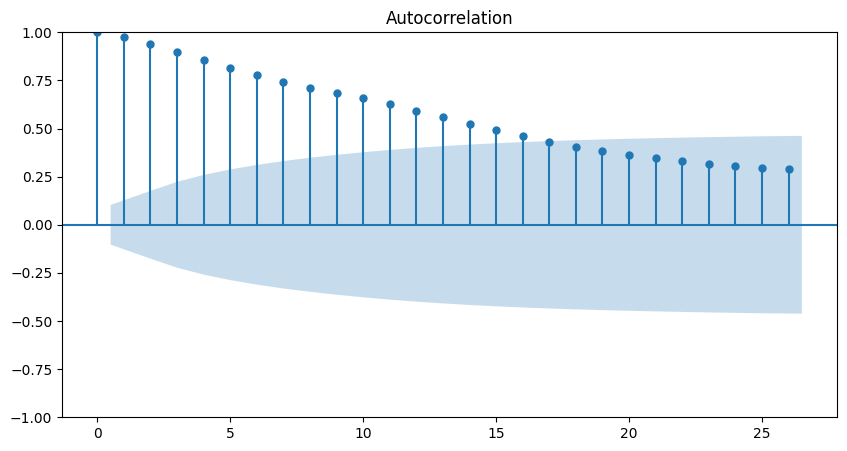

In [37]:
plt.rc("figure", figsize=(10,5))
plot_acf(df['cpo_pri'])
print()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



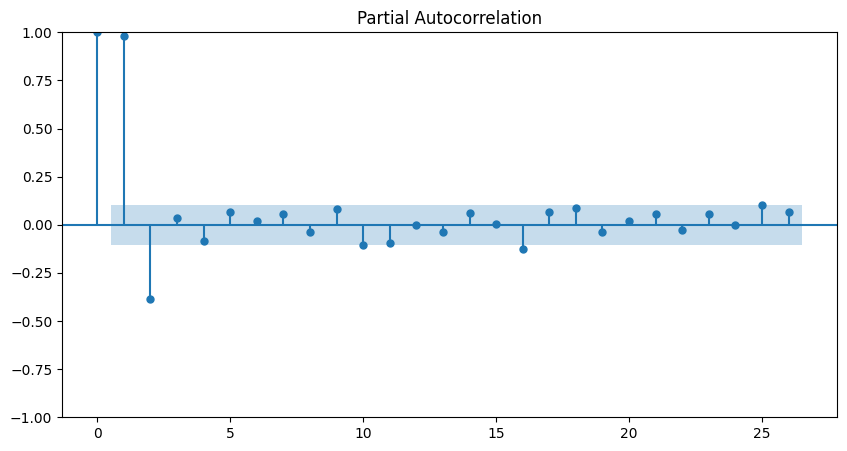

In [38]:
plt.rc("figure", figsize=(10,5))
plot_pacf(df['cpo_pri'])
print()

In [39]:
df.head(10)

,cpo_pri
date,
1993-03-01,408.0
1993-04-01,392.0
1993-05-01,371.0
1993-06-01,356.0
1993-07-01,362.0
1993-08-01,356.0
1993-09-01,352.0
1993-10-01,333.0
1993-11-01,357.0


In [40]:
#save the cleaned data to csv
df_cl = df.to_csv('df_cl.csv')